In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

In [2]:
dataset = pd.DataFrame({'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
                        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
                        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]})
dataset

,x1,x2,label,label_index
0,1.5,1.0,A,1.0
1,2.0,2.5,A,1.0
2,3.0,3.0,A,1.0
3,1.5,-2.0,A,1.0
4,0.5,2.0,A,1.0
5,-1.0,-3.0,B,-1.0
6,-2.0,-1.2,B,-1.0
7,-3.0,-0.5,B,-1.0
8,-1.5,2.0,B,-1.0
9,0.0,-1.5,B,-1.0


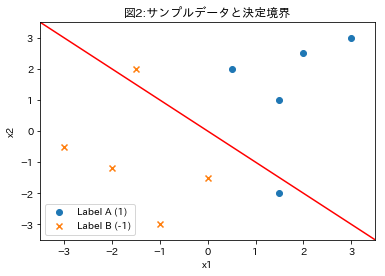

In [3]:
# ラベルAのプロット
label_a = dataset[dataset['label_index'] == 1]
plt.scatter(label_a['x1'], label_a['x2'], label='Label A (1)', marker='o')

# ラベルBのプロット
label_b = dataset[dataset['label_index'] == -1]
plt.scatter(label_b['x1'], label_b['x2'], label='Label B (-1)', marker='x')

# 決定境界のプロット
line_x = np.linspace(-4, 4, 4)
plt.plot(line_x, line_x * -1, 'r-')

plt.title('図2:サンプルデータと決定境界')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
plt.legend()

In [4]:
import copy


def discriminant(p, w):
    """
    識別関数
    :param p: 特徴ベクトル
    :param w: 係数ベクトル
    :return: 識別結果
    """
    return np.dot(p, w)


def activate(x):
    """
    活性化関数（ステップ関数）
    :param x: 識別結果
    :return: ラベル
    """
    if -1 < x:
        return 1
    else:
        return -1


data_size = len(dataset.index)

# 特徴ベクトル
x = np.array(dataset.loc[:, ['x1', 'x2']])

# 係数ベクトル
w = [1, 1]

# 正解ラベル
label_answer = np.array(dataset['label_index'])

# 識別関数の値
output_test = np.zeros(data_size)

# 予測ラベル
label_test = np.zeros(data_size)

# 予測結果の正否
result = np.zeros(data_size)

# データセットからラベルを予測
for i in range(data_size):
    output_test[i] = discriminant(x[i], w)
    label_test[i] = activate(output_test[i])
    result[i] = label_answer[i] == label_test[i]

# 予測結果の出力
dataset_test = copy.deepcopy(dataset)
dataset_test['識別関数の値'] = output_test
dataset_test['予測ラベル'] = label_test
dataset_test['予測の正否'] = result
dataset_test

,x1,x2,label,label_index,識別関数の値,予測ラベル,予測の正否
0,1.5,1.0,A,1.0,2.5,1.0,1.0
1,2.0,2.5,A,1.0,4.5,1.0,1.0
2,3.0,3.0,A,1.0,6.0,1.0,1.0
3,1.5,-2.0,A,1.0,-0.5,1.0,1.0
4,0.5,2.0,A,1.0,2.5,1.0,1.0
5,-1.0,-3.0,B,-1.0,-4.0,-1.0,1.0
6,-2.0,-1.2,B,-1.0,-3.2,-1.0,1.0
7,-3.0,-0.5,B,-1.0,-3.5,-1.0,1.0
8,-1.5,2.0,B,-1.0,0.5,1.0,0.0
9,0.0,-1.5,B,-1.0,-1.5,-1.0,1.0


In [5]:
# 誤差
error = 0

for i in range(data_size):
    if result[i] == 0:
        error -= output_test[i] * label_answer[i]

pd.DataFrame([[np.sum(result == 0), error]], columns=['誤分類の個数', '誤差'])

,誤分類の個数,誤差
0,1,0.5


<1回目>
誤差関数の値 : 0.50
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.00, w1 = 1.00

<2回目>
誤差関数の値 : -0.12
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.15, w1 = 0.80

<3回目>
誤差関数の値 : -1.65
誤分類の個数 : 2
係数ベクトルの値 : w0 = 1.30, w1 = 0.60

<4回目>
誤差関数の値 : -0.60
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.45, w1 = 0.40

<5回目>
誤差関数の値 : -0.83
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.45, w1 = 0.55

<6回目>
誤差関数の値 : -0.77
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.45, w1 = 0.70

<7回目>
誤差関数の値 : -0.75
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.60, w1 = 0.50

<8回目>
誤差関数の値 : -0.98
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.60, w1 = 0.65

<9回目>
誤差関数の値 : -0.80
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.60, w1 = 0.80

<10回目>
誤差関数の値 : -0.90
誤分類の個数 : 1
係数ベクトルの値 : w0 = 1.75, w1 = 0.60

<11回目>
誤差関数の値 : 0.00
誤分類の個数 : 0
係数ベクトルの値 : w0 = 1.75, w1 = 0.75



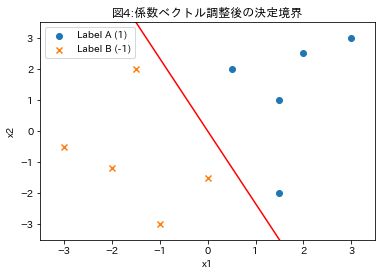

In [6]:
# 学習率
eta = 0.1

# 最大試行回数
max_iter = 100

for i in range(max_iter):
    output_test = np.zeros(data_size)
    label_test = np.zeros(data_size)
    result = np.zeros(data_size)

    # データセットから予測ラベルを出力
    for j in range(data_size):
        output_test[j] = discriminant(x[j], w)
        label_test[j] = activate(output_test[j])
        result[j] = label_answer[j] == label_test[j]

    # 誤差を求める
    error = 0

    for j in range(data_size):
        if result[j] == 0.0:
            error -= (output_test[j] * label_answer[j])

    # 誤分類の個数
    miss_classification = np.sum(result == 0.0)

    print('<{0}回目>'.format(i + 1))
    print('誤差関数の値 : {0:.2f}'.format(error))
    print('誤分類の個数 : {0}'.format(miss_classification))
    print('係数ベクトルの値 : w0 = {0:.2f}, w1 = {1:.2f}'.format(w[0], w[1]))
    print()

    # 全て正解ラベルに分類できたら試行を終了
    if miss_classification == 0:
        break

    # 係数の更新（確率的勾配降下法）
    for j in np.random.permutation(np.arange(data_size)):
        if result[j] == 0.0:
            w += eta * x[j] * label_answer[j]
            break

# グラフ描画
plt.title('図4:係数ベクトル調整後の決定境界')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])

# ラベルAのプロット
plt.scatter(label_a['x1'], label_a['x2'], label='Label A (1)', marker='o')

# ラベルBのプロット
plt.scatter(label_b['x1'], label_b['x2'], label='Label B (-1)', marker='x')

# 決定境界のプロット
line_x1 = np.linspace(-4, 4, 4)
plt.plot(line_x1, -1 * line_x1 * w[0] / w[1], 'r-')

plt.legend()

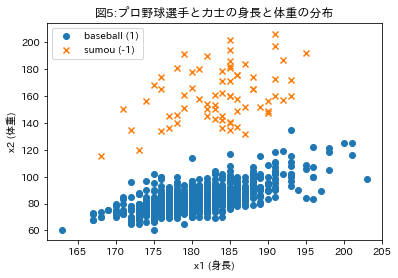

In [7]:
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')[['身長', '体重']]
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')[['身長', '体重']]
plt.title('図5:プロ野球選手と力士の身長と体重の分布')
plt.scatter(baseball['身長'], baseball['体重'], label='baseball (1)', marker='o')
plt.scatter(sumou['身長'], sumou['体重'], label='sumou (-1)', marker='x')
plt.xlabel('x1 (身長)')
plt.ylabel('x2 (体重)')
plt.legend()

<1回目>
誤差関数の値 : 24179.00
誤分類の個数 : 70
係数ベクトル : w0 = 1.00, w1 = 1.00 ,w2 = 1.00 

<2回目>
誤差関数の値 : 3535170.20
誤分類の個数 : 822
係数ベクトル : w0 = 0.90, w1 = -17.30 ,w2 = -14.00 

<3回目>
誤差関数の値 : 217453.20
誤分類の個数 : 822
係数ベクトル : w0 = 1.00, w1 = 0.90 ,w2 = -5.10 

<4回目>
誤差関数の値 : 284588.10
誤分類の個数 : 70
係数ベクトル : w0 = 1.10, w1 = 19.60 ,w2 = 2.90 

<5回目>
誤差関数の値 : 539246.40
誤分類の個数 : 822
係数ベクトル : w0 = 1.00, w1 = 1.80 ,w2 = -11.70 

<6回目>
誤差関数の値 : 224095.50
誤分類の個数 : 70
係数ベクトル : w0 = 1.10, w1 = 20.50 ,w2 = -3.50 

<7回目>
誤差関数の値 : 1454411.20
誤分類の個数 : 822
係数ベクトル : w0 = 1.00, w1 = 1.40 ,w2 = -24.10 

<8回目>
誤差関数の値 : 48332.60
誤分類の個数 : 70
係数ベクトル : w0 = 1.10, w1 = 18.30 ,w2 = -16.60 

<9回目>
誤差関数の値 : 2179497.20
誤分類の個数 : 822
係数ベクトル : w0 = 1.00, w1 = 0.70 ,w2 = -33.10 

<10回目>
誤差関数の値 : 13352.30
誤分類の個数 : 41
係数ベクトル : w0 = 1.10, w1 = 19.80 ,w2 = -22.40 

<11回目>
誤差関数の値 : 2179168.80
誤分類の個数 : 822
係数ベクトル : w0 = 1.00, w1 = 2.70 ,w2 = -37.40 

<12回目>
誤差関数の値 : 95.10
誤分類の個数 : 3
係数ベクトル : w0 = 1.10, w1 = 20.50 ,w2 = -29.40 

<13回目>
誤差関

<102回目>
誤差関数の値 : 550.40
誤分類の個数 : 2
係数ベクトル : w0 = 1.30, w1 = 90.30 ,w2 = -128.70 

<103回目>
誤差関数の値 : 71107.80
誤分類の個数 : 78
係数ベクトル : w0 = 1.20, w1 = 73.50 ,w2 = -140.20 

<104回目>
誤差関数の値 : 470.70
誤分類の個数 : 2
係数ベクトル : w0 = 1.30, w1 = 91.10 ,w2 = -130.20 

<105回目>
誤差関数の値 : 83616.00
誤分類の個数 : 88
係数ベクトル : w0 = 1.20, w1 = 73.80 ,w2 = -142.20 

<106回目>
誤差関数の値 : 426.90
誤分類の個数 : 3
係数ベクトル : w0 = 1.30, w1 = 92.20 ,w2 = -132.20 

<107回目>
誤差関数の値 : 71937.00
誤分類の個数 : 78
係数ベクトル : w0 = 1.20, w1 = 75.40 ,w2 = -143.70 

<108回目>
誤差関数の値 : 1947.20
誤分類の個数 : 3
係数ベクトル : w0 = 1.30, w1 = 95.50 ,w2 = -132.10 

<109回目>
誤差関数の値 : 64861.90
誤分類の個数 : 69
係数ベクトル : w0 = 1.20, w1 = 76.80 ,w2 = -145.30 

<110回目>
誤差関数の値 : 825.60
誤分類の個数 : 3
係数ベクトル : w0 = 1.30, w1 = 95.60 ,w2 = -135.30 

<111回目>
誤差関数の値 : 51426.00
誤分類の個数 : 57
係数ベクトル : w0 = 1.20, w1 = 78.80 ,w2 = -146.80 

<112回目>
誤差関数の値 : 1796.60
誤分類の個数 : 3
係数ベクトル : w0 = 1.30, w1 = 97.30 ,w2 = -135.10 

<113回目>
誤差関数の値 : 36384.80
誤分類の個数 : 36
係数ベクトル : w0 = 1.20, w1 = 80.50 ,w2 = -146.6

<207回目>
誤差関数の値 : 1046.00
誤分類の個数 : 1
係数ベクトル : w0 = 1.20, w1 = 135.10 ,w2 = -200.90 

<208回目>
誤差関数の値 : 44143.60
誤分類の個数 : 26
係数ベクトル : w0 = 1.30, w1 = 154.40 ,w2 = -187.40 

<209回目>
誤差関数の値 : 885.80
誤分類の個数 : 1
係数ベクトル : w0 = 1.20, w1 = 136.00 ,w2 = -201.00 

<210回目>
誤差関数の値 : 48192.50
誤分類の個数 : 27
係数ベクトル : w0 = 1.30, w1 = 155.30 ,w2 = -187.50 

<211回目>
誤差関数の値 : 725.60
誤分類の個数 : 1
係数ベクトル : w0 = 1.20, w1 = 136.90 ,w2 = -201.10 

<212回目>
誤差関数の値 : 52381.20
誤分類の個数 : 28
係数ベクトル : w0 = 1.30, w1 = 156.20 ,w2 = -187.60 

<213回目>
誤差関数の値 : 547.00
誤分類の個数 : 2
係数ベクトル : w0 = 1.20, w1 = 139.00 ,w2 = -201.10 

<214回目>
誤差関数の値 : 63643.20
誤分類の個数 : 31
係数ベクトル : w0 = 1.30, w1 = 158.30 ,w2 = -187.60 

<215回目>
誤差関数の値 : 546.80
誤分類の個数 : 3
係数ベクトル : w0 = 1.20, w1 = 139.70 ,w2 = -201.30 

<216回目>
誤差関数の値 : 66746.00
誤分類の個数 : 32
係数ベクトル : w0 = 1.30, w1 = 159.00 ,w2 = -187.80 

<217回目>
誤差関数の値 : 554.00
誤分類の個数 : 2
係数ベクトル : w0 = 1.20, w1 = 140.00 ,w2 = -202.70 

<218回目>
誤差関数の値 : 62250.60
誤分類の個数 : 30
係数ベクトル : w0 = 1.30, w1 = 159.30 ,

<314回目>
誤差関数の値 : 7674.90
誤分類の個数 : 8
係数ベクトル : w0 = 0.90, w1 = 153.30 ,w2 = -249.70 

<315回目>
誤差関数の値 : 2993.30
誤分類の個数 : 3
係数ベクトル : w0 = 1.00, w1 = 171.30 ,w2 = -238.30 

<316回目>
誤差関数の値 : 10802.50
誤分類の個数 : 10
係数ベクトル : w0 = 0.90, w1 = 152.60 ,w2 = -251.50 

<317回目>
誤差関数の値 : 3422.80
誤分類の個数 : 3
係数ベクトル : w0 = 1.00, w1 = 172.60 ,w2 = -239.00 

<318回目>
誤差関数の値 : 4918.80
誤分類の個数 : 5
係数ベクトル : w0 = 0.90, w1 = 155.80 ,w2 = -250.50 

<319回目>
誤差関数の値 : 5967.20
誤分類の個数 : 5
係数ベクトル : w0 = 1.00, w1 = 175.80 ,w2 = -238.00 

<320回目>
誤差関数の値 : 4274.70
誤分類の個数 : 3
係数ベクトル : w0 = 0.90, w1 = 157.10 ,w2 = -251.20 

<321回目>
誤差関数の値 : 4470.70
誤分類の個数 : 4
係数ベクトル : w0 = 1.00, w1 = 175.10 ,w2 = -239.80 

<322回目>
誤差関数の値 : 6131.60
誤分類の個数 : 7
係数ベクトル : w0 = 0.90, w1 = 156.60 ,w2 = -253.30 

<323回目>
誤差関数の値 : 5109.50
誤分類の個数 : 4
係数ベクトル : w0 = 1.00, w1 = 176.70 ,w2 = -240.80 

<324回目>
誤差関数の値 : 3198.90
誤分類の個数 : 1
係数ベクトル : w0 = 0.90, w1 = 159.90 ,w2 = -252.30 

<325回目>
誤差関数の値 : 9009.60
誤分類の個数 : 6
係数ベクトル : w0 = 1.00, w1 = 179.20 ,w2 = 

<417回目>
誤差関数の値 : 28156.10
誤分類の個数 : 17
係数ベクトル : w0 = 0.80, w1 = 203.90 ,w2 = -258.40 

<418回目>
誤差関数の値 : 917.80
誤分類の個数 : 1
係数ベクトル : w0 = 0.70, w1 = 185.50 ,w2 = -272.00 

<419回目>
誤差関数の値 : 30701.70
誤分類の個数 : 17
係数ベクトル : w0 = 0.80, w1 = 204.80 ,w2 = -258.50 

<420回目>
誤差関数の値 : 1021.90
誤分類の個数 : 1
係数ベクトル : w0 = 0.70, w1 = 185.80 ,w2 = -273.20 

<421回目>
誤差関数の値 : 28835.40
誤分類の個数 : 17
係数ベクトル : w0 = 0.80, w1 = 205.10 ,w2 = -259.70 

<422回目>
誤差関数の値 : 935.00
誤分類の個数 : 1
係数ベクトル : w0 = 0.70, w1 = 186.60 ,w2 = -273.70 

<423回目>
誤差関数の値 : 30141.50
誤分類の個数 : 17
係数ベクトル : w0 = 0.80, w1 = 205.90 ,w2 = -260.20 

<424回目>
誤差関数の値 : 861.60
誤分類の個数 : 1
係数ベクトル : w0 = 0.70, w1 = 187.40 ,w2 = -274.30 

<425回目>
誤差関数の値 : 31214.90
誤分類の個数 : 17
係数ベクトル : w0 = 0.80, w1 = 206.70 ,w2 = -260.80 

<426回目>
誤差関数の値 : 787.50
誤分類の個数 : 2
係数ベクトル : w0 = 0.70, w1 = 188.10 ,w2 = -274.50 

<427回目>
誤差関数の値 : 16587.50
誤分類の個数 : 10
係数ベクトル : w0 = 0.60, w1 = 171.30 ,w2 = -286.00 

<428回目>
誤差関数の値 : 958.50
誤分類の個数 : 2
係数ベクトル : w0 = 0.70, w1 = 190.60 ,

<519回目>
誤差関数の値 : 5730.00
誤分類の個数 : 4
係数ベクトル : w0 = 0.40, w1 = 191.30 ,w2 = -307.00 

<520回目>
誤差関数の値 : 2026.70
誤分類の個数 : 3
係数ベクトル : w0 = 0.50, w1 = 209.30 ,w2 = -295.60 

<521回目>
誤差関数の値 : 5494.00
誤分類の個数 : 4
係数ベクトル : w0 = 0.40, w1 = 192.00 ,w2 = -307.60 

<522回目>
誤差関数の値 : 2550.20
誤分類の個数 : 3
係数ベクトル : w0 = 0.50, w1 = 210.50 ,w2 = -295.90 

<523回目>
誤差関数の値 : 4884.60
誤分類の個数 : 3
係数ベクトル : w0 = 0.40, w1 = 193.20 ,w2 = -307.90 

<524回目>
誤差関数の値 : 4156.70
誤分類の個数 : 3
係数ベクトル : w0 = 0.50, w1 = 212.50 ,w2 = -294.40 

<525回目>
誤差関数の値 : 3526.00
誤分類の個数 : 1
係数ベクトル : w0 = 0.40, w1 = 195.70 ,w2 = -305.90 

<526回目>
誤差関数の値 : 6512.20
誤分類の個数 : 4
係数ベクトル : w0 = 0.50, w1 = 215.00 ,w2 = -292.40 

<527回目>
誤差関数の値 : 3371.60
誤分類の個数 : 1
係数ベクトル : w0 = 0.40, w1 = 196.50 ,w2 = -305.90 

<528回目>
誤差関数の値 : 7163.10
誤分類の個数 : 5
係数ベクトル : w0 = 0.50, w1 = 215.80 ,w2 = -292.40 

<529回目>
誤差関数の値 : 2783.10
誤分類の個数 : 1
係数ベクトル : w0 = 0.40, w1 = 198.50 ,w2 = -304.40 

<530回目>
誤差関数の値 : 10432.90
誤分類の個数 : 6
係数ベクトル : w0 = 0.50, w1 = 217.80 ,w2 = -

<620回目>
誤差関数の値 : 27617.80
誤分類の個数 : 13
係数ベクトル : w0 = 0.30, w1 = 235.10 ,w2 = -300.30 

<621回目>
誤差関数の値 : 872.50
誤分類の個数 : 2
係数ベクトル : w0 = 0.20, w1 = 216.70 ,w2 = -314.50 

<622回目>
誤差関数の値 : 28513.90
誤分類の個数 : 13
係数ベクトル : w0 = 0.30, w1 = 236.00 ,w2 = -301.00 

<623回目>
誤差関数の値 : 859.00
誤分類の個数 : 2
係数ベクトル : w0 = 0.20, w1 = 217.40 ,w2 = -314.70 

<624回目>
誤差関数の値 : 29961.60
誤分類の個数 : 15
係数ベクトル : w0 = 0.30, w1 = 236.70 ,w2 = -301.20 

<625回目>
誤差関数の値 : 879.50
誤分類の個数 : 2
係数ベクトル : w0 = 0.20, w1 = 217.70 ,w2 = -316.10 

<626回目>
誤差関数の値 : 28064.10
誤分類の個数 : 13
係数ベクトル : w0 = 0.30, w1 = 237.00 ,w2 = -302.60 

<627回目>
誤差関数の値 : 896.00
誤分類の個数 : 2
係数ベクトル : w0 = 0.20, w1 = 218.00 ,w2 = -317.30 

<628回目>
誤差関数の値 : 11133.60
誤分類の個数 : 8
係数ベクトル : w0 = 0.10, w1 = 201.20 ,w2 = -328.80 

<629回目>
誤差関数の値 : 849.50
誤分類の個数 : 2
係数ベクトル : w0 = 0.20, w1 = 219.70 ,w2 = -317.10 

<630回目>
誤差関数の値 : 31366.60
誤分類の個数 : 16
係数ベクトル : w0 = 0.30, w1 = 239.00 ,w2 = -303.60 

<631回目>
誤差関数の値 : 1032.60
誤分類の個数 : 3
係数ベクトル : w0 = 0.20, w1 = 221.30 ,w

<765回目>
誤差関数の値 : 2802.50
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 228.90 ,w2 = -348.00 

<766回目>
誤差関数の値 : 9562.50
誤分類の個数 : 6
係数ベクトル : w0 = -0.10, w1 = 248.20 ,w2 = -334.50 

<767回目>
誤差関数の値 : 2648.10
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 229.70 ,w2 = -348.00 

<768回目>
誤差関数の値 : 10428.90
誤分類の個数 : 6
係数ベクトル : w0 = -0.10, w1 = 249.00 ,w2 = -334.50 

<769回目>
誤差関数の値 : 2540.00
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 230.40 ,w2 = -348.20 

<770回目>
誤差関数の値 : 11032.00
誤分類の個数 : 6
係数ベクトル : w0 = -0.10, w1 = 249.70 ,w2 = -334.70 

<771回目>
誤差関数の値 : 2385.60
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 231.20 ,w2 = -348.20 

<772回目>
誤差関数の値 : 11898.40
誤分類の個数 : 6
係数ベクトル : w0 = -0.10, w1 = 250.50 ,w2 = -334.70 

<773回目>
誤差関数の値 : 1633.10
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 233.70 ,w2 = -346.20 

<774回目>
誤差関数の値 : 16382.80
誤分類の個数 : 7
係数ベクトル : w0 = -0.10, w1 = 253.00 ,w2 = -332.70 

<775回目>
誤差関数の値 : 1525.00
誤分類の個数 : 1
係数ベクトル : w0 = -0.20, w1 = 234.40 ,w2 = -346.40 

<776回目>
誤差関数の値 : 17129.90
誤分類の個数 : 8
係数ベクトル : w0 = -0.10, w1 

<903回目>
誤差関数の値 : 5625.40
誤分類の個数 : 3
係数ベクトル : w0 = -0.60, w1 = 253.10 ,w2 = -348.80 

<904回目>
誤差関数の値 : 3199.30
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 = 235.80 ,w2 = -360.80 

<905回目>
誤差関数の値 : 7539.30
誤分類の個数 : 4
係数ベクトル : w0 = -0.60, w1 = 255.10 ,w2 = -347.30 

<906回目>
誤差関数の値 : 2610.80
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 = 237.80 ,w2 = -359.30 

<907回目>
誤差関数の値 : 10440.70
誤分類の個数 : 6
係数ベクトル : w0 = -0.60, w1 = 257.10 ,w2 = -345.80 

<908回目>
誤差関数の値 : 2502.70
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 = 238.50 ,w2 = -359.50 

<909回目>
誤差関数の値 : 11043.80
誤分類の個数 : 6
係数ベクトル : w0 = -0.60, w1 = 257.80 ,w2 = -346.00 

<910回目>
誤差関数の値 : 2342.50
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 = 239.40 ,w2 = -359.60 

<911回目>
誤差関数の値 : 11941.00
誤分類の個数 : 6
係数ベクトル : w0 = -0.60, w1 = 258.70 ,w2 = -346.10 

<912回目>
誤差関数の値 : 2234.40
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 = 240.10 ,w2 = -359.80 

<913回目>
誤差関数の値 : 12544.10
誤分類の個数 : 6
係数ベクトル : w0 = -0.60, w1 = 259.40 ,w2 = -346.30 

<914回目>
誤差関数の値 : 2126.30
誤分類の個数 : 1
係数ベクトル : w0 = -0.70, w1 =

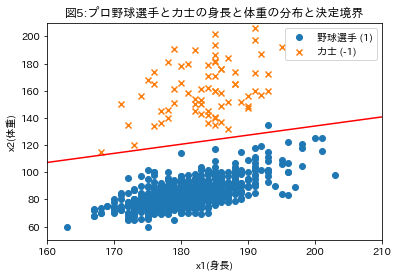

In [8]:
# 正解例

# データセット
data_baseball = baseball.rename(columns={'身長': 'x1', '体重': 'x2'}).assign(label='野球', label_index=1.0, x0=1)
data_sumou = sumou.rename(columns={'身長': 'x1', '体重': 'x2'}).assign(label='相撲', label_index=-1.0, x0=1)
dataset = pd.concat([data_baseball, data_sumou]).loc[:, ['label', 'label_index', 'x0', 'x1', 'x2']]

# 学習率
eta = 0.1

# 最大試行回数
max_iter = 1000

data_size = len(dataset.index)

# 特徴ベクトル
x = np.array(dataset.loc[:, ['x0', 'x1', 'x2']])

# 係数ベクトル
w = [1, 1, 1]

# 正解のラベル
label_answer = np.array(dataset['label_index'])

for i in range(max_iter):
    output_test = np.zeros(data_size)
    label_test = np.zeros(data_size)
    result = np.zeros(data_size)

    # データセットから予測ラベルを出力
    for j in range(data_size):
        output_test[j] = discriminant(x[j], w)
        label_test[j] = activate(output_test[j])
        result[j] = label_answer[j] == label_test[j]

    # 誤差
    error = 0

    for j in range(data_size):
        if result[j] == 0.0:
            error -= (output_test[j] * label_answer[j])

    # 誤分類の個数
    miss_classification = np.sum(result == 0.0)

    print('<{0}回目>'.format(i + 1))
    print('誤差関数の値 : {0:.2f}'.format(error))
    print('誤分類の個数 : {0}'.format(miss_classification))
    print('係数ベクトル : w0 = {0:.2f}, w1 = {1:.2f} ,w2 = {2:.2f} '.format(w[0], w[1], w[2]))
    print()

    # 全て正解ラベルに分類できたら試行を終了
    if miss_classification == 0:
        break

    # 係数の更新
    for j in np.random.permutation(np.arange(data_size)):
        if result[j] == 0.0:
            w += eta * x[j] * label_answer[j]
            break

# グラフ描画
plt.title('図5:プロ野球選手と力士の身長と体重の分布と決定境界')
plt.xlabel('x1(身長)')
plt.ylabel('x2(体重)')
plt.xlim([160, 210])
plt.ylim([50, 210])

# ラベルAのプロット
plt.scatter(data_baseball['x1'], data_baseball['x2'], label='野球選手 (1)', marker='o')

# ラベルBのプロット
plt.scatter(data_sumou['x1'], data_sumou['x2'], label='力士 (-1)', marker='x')

# 決定境界のプロット
line_x1 = np.linspace(160, 210, 50)
line_x2 = -1 * (line_x1 * w[1] + w[0]) / w[2]
plt.plot(line_x1, line_x2, 'r-')

plt.legend()